## Handwritten Digit Recognition - MNIST Dataset - CNN - Python/Keras

This is a Multi-Class Classification problem (10 classes)
- Language: Python
- Deep Learning Package: Keras
- Dataset: MNIST dataset available with Keras
- Model: MLP, CNN

#### Load Dataset

Load train and test datasets

In [ ]:
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

We have following with us:

<br>**Training Set**
- 60000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 60000 labels defining the digit that corresponds to the respective image

<br>**Test Set**
- 10000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 10000 labels defining the digit that corresponds to the respective image

#### Dataset Visualization

Let us visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

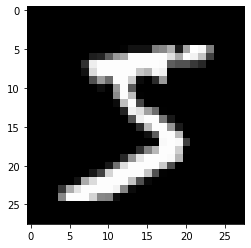

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

5

### MLP based solution

#### Define the model
- Input Shape: Column Vector corresponding to 28x28 image matrix for the digit = 784 rows,1 column = 784,1
- 1st hidden layer: Number of neurons = 512
- 1st hidden layer: Activation Function = relu (for non-linearity detection)
- Output layer: Number of neurons = 10 (corresponding to 0 to 9 digits)
- Output layer: Activation Function = softmax (to get probabilities for the repective 10 classes)

In [ ]:
from keras import models

In [ ]:
from keras import layers

In [ ]:
model_mlp = models.Sequential()

In [ ]:
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

In [ ]:
model_mlp.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Define the optimizer function, loss function and metrics to be used for the model.
- Going ahead with the well known functions at this point in time
- Selected accuracy as the metrics to understand validation / test accuracy of the model

In [ ]:
model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### We will preprocess the data before feeding it to the model:
- Change the images to column vector form: 28x28 -> 784x1 to match to model's input expectations
- Change the vector values from int to float: to get continuos values as we move thro's model's layers
- Scale the vector values to be in the [0,1] interval: model will see all samples with equal weightage as the range of values for all samples are same.

Note: gray scale values will be from 0 to 255... hence dividing the float by 255 will give us the values in [0,1] interval

#### Data Preprocessing - Train Images

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_mlp = train_images.reshape(60000, 28*28)

In [ ]:
train_images_mlp.shape

(60000, 784)

In [ ]:
# type is an int
# chose a non-zero value element ... somewhere in the middle of the column vector
type(train_images_mlp[0][350])

numpy.uint8

In [ ]:
train_images_mlp[0][350]

70

In [ ]:
train_images_mlp = train_images_mlp.astype('float32') / 255

In [ ]:
# type has changed to float
type(train_images_mlp[0][350])

numpy.float32

In [ ]:
train_images_mlp[0][350]

0.27450982

In [ ]:
70/255

0.27450980392156865

#### Data Preprocessing - Test Images

In [ ]:
test_images_mlp = test_images.reshape(10000,28*28)

In [ ]:
test_images_mlp = test_images_mlp.astype('float32') / 255

#### We will process the data labels:
- We have ten output classes ... consider it as a 10bit output
- We need to represent the label as a 10bit value where bit corresponding to the digit value will be 1 and rest all 9 bits will be 0
- Say label = 5. We will change it to a 10bit value as 0000010000 (note as the index starts at 0, 6th element corresponds to digit 5 and hence is 1 and rest are zero)

#### Data Preprocessing - Train Labels

In [ ]:
train_labels[0]

5

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_mlp = to_categorical(train_labels)

In [ ]:
train_labels_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Data Preprocessing - Train Labels

In [ ]:
test_labels_mlp = to_categorical(test_labels)

#### Train the Model

We will now train the model using train images and train labels.
- We will use a batch size = 120.
- 1 epoch = 60000 / 120 = 500 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete run of the all train samples

In [ ]:
model_mlp.fit(train_images_mlp, train_labels_mlp, epochs = 5, batch_size = 120)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.2532 - accuracy: 0.9264
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.1022 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0677 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0371 - accuracy: 0.9890


At this run, we got a training accuracy of **~98.9%**

#### Test the Model

We will now test model's performance with the test data.
- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [ ]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_mlp, test_labels_mlp)

10000/10000 [==============================] - 1s 56us/step


In [ ]:
print('test accuracy:', (test_acc_mlp*100))

test accuracy: 98.01999926567078


At this run, we got a training accuracy of **~98.0%**

### CNN based solution

#### Define Model

In [ ]:
from keras import models

In [ ]:
from keras import layers

In [ ]:
model_cnn = models.Sequential()

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 32
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)
- Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)

In [ ]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [ ]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [ ]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Layer Details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [ ]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

In [ ]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

Data at this stage is in matrix form. We will convert it to vector form to feed to a fully connected network (FCN).

In [ ]:
model_cnn.add(layers.Flatten())

We will design for 64 outputs with activation function as relu (to learn non-linearity).

In [ ]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

This is the final layer. Hence, the outputs will be 10 corresponding to the 10 digits (0 to 9).
Activation Function chosen here is softmax to have a probabilistic output.

In [ ]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

#### Data Preprocessing - Train and Test Images

In [ ]:
train_images.shape

(60000, 28, 28)

CNN needs another dimension for the channel. Here as the image is gray scale it will be 1 channel. If we had color images, the channel value would have been 3 for the three channels - Red, Green and Blue.

In [ ]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [ ]:
train_images_cnn.shape

(60000, 28, 28, 1)

We need to change the element values from integer to decimal to have continuos values during prediction through the various layers. We will limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed. We will do this by dividing the decimal values by 255 (gray scale values are from 0 to 255 ... 0 representing black to white).

In [ ]:
train_images_cnn = train_images_cnn.astype('float32') / 255

In [ ]:
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [ ]:
test_images_cnn = test_images_cnn.astype('float32') / 255

#### Data Preprocessing - Train and Test Labels

We will convert the labels to 10bit values. Only 1 of the bits of the 10bit value will be 1 corresponding to the location for the respective digit and rest all bits will be 0. This is required to match to the model's output layer expectation so that we can effectively train and test.

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_cnn = to_categorical(train_labels)

In [ ]:
test_labels_cnn = to_categorical(test_labels)

#### Define the optimizer function, loss function and metrics to be used for the model.
- Going ahead with the well known functions at this point in time
- Selected accuracy as the metrics to understand validation / test accuracy of the model

In [ ]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

#### We will now train the model using train images and train labels.
- We will use a batch size = 60.
- 1 epoch = 60000 / 60 = 1000 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete run of the all train samples

In [ ]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
60000/60000 [==============================] - 38s 636us/step - loss: 0.1731 - accuracy: 0.9459
Epoch 2/5
60000/60000 [==============================] - 38s 639us/step - loss: 0.0477 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 39s 647us/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 40s 665us/step - loss: 0.0243 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 39s 645us/step - loss: 0.0198 - accuracy: 0.9941


At this run, we got a training accuracy of **~99.4%**

#### Test the Model

We will now test model's performance with the test data.
- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [ ]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

10000/10000 [==============================] - 2s 181us/step


In [ ]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.26999807357788


At this run, we got a training accuracy of **~99.3%**

#### Key Results
**MLP based solution**
- Input (784x1 column vector) -> 1 hidden layer (512 neurons, relu) -> Output (10 classes, softmax)
- Number of parameters = **407050**
- Training Accuracy = **~98.9%**
- Test Accuracy = **~98.0%**


**CNN based solution**
- Input (28x28x1 matrix) -> Conv(32 3x3 filters, relu) -> Maxpool(2x2) -> Conv(64 3x3 filters, relu) -> Maxpool(2x2) -> Conv(64 3x3 filters, relu) -> Flatten to a column vector for FCN -> FCN (64 outputs, relu) -> FCN (10 outputs, softmax)
- Number of parameters = **93322**
- Training Accuracy = **~99.4%**
- Test Accuracy = **~99.3%**

#### Conclusion
CNN has the advantage of using the spatial information in the image as compared to MLP, hence achieves better accuracy with reduced parameters.